In [3]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [4]:
[x[3],x[7],x[2]]

[71, 86, 14]

In [5]:
ind = [3,7,2]
x[ind]

array([71, 86, 14])

In [6]:
ind = np.array([[3,7],
               [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [9]:
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
row = np.array([0,1,2])
col = np.array([2,1,3])
x[row,col] # x[0,2] x[1,1] x[2,3] 을 출력

array([ 2,  5, 11])

In [12]:
x[row[:, np.newaxis], col] # 팬시 인덱싱에서 인덱스 쌍을 만드는 것은 브로드캐스팅 규칙을 따른다

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [17]:
x[2,[2,0,1]]
x[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [18]:
mask = np.array([1,0,1,0], dtype=bool)
x[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

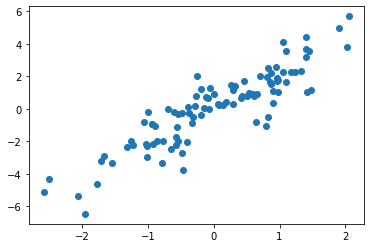

In [21]:
#예제 임의의 점 선택하기
mean  = [0,0]
cov = [[1,2],
       [2,5]]
X = rand.multivariate_normal(mean,cov,100)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set
plt.scatter(X[:,0], X[:,1]);

In [25]:
indices = np.random.choice(X.shape[0], 20, replace=False)
selection = X[indices]
selection.shape

(20, 2)

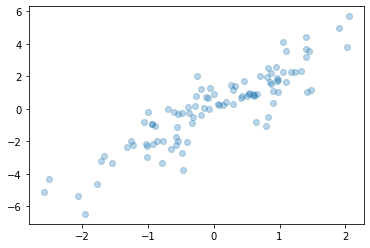

In [27]:
plt.scatter(X[:,0], X[:,1], alpha = 0.3)
plt.scatter(selection[:,0], selection[:,1],
           facecolor = 'none', s=200);